# 목적
* Conv2DTranspose 에 관해 알아보자.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tf.__version__

'2.2.0'

```python
tf.keras.layers.Conv2DTranspose(
    filters, kernel_size, strides=(1, 1), padding='valid', output_padding=None,
    data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)
```

* Conv2DTranspose의 입력은 4D tensor 여야 함
* 모양은 
  * ```(batch_size, channels, rows, cols)```, ```data_format='channels_first'``` 일 때,
  * ```(batch_size, rows, cols, channels)```, ```data_format='channels_last'``` 일 때,

* 이 예제에서

In [3]:
batch_size = 1
rows = 1
cols = 10
channels = 1

In [4]:
np.random.seed(0)
x = np.array(np.random.rand(batch_size, rows, cols, channels), dtype=np.float32)
print(x.shape)
print(x)

(1, 1, 10, 1)
[[[[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]]]


* Conv2DTranspose 출력의 모양은 (output_padding 이 정해졌을 때)


$$
new\_rows = ((rows-1) \times strides[0] + kernel\_size[0] - 2 \times padding[0] + output\_padding[0])
$$

$$
new\_cols = ((cols - 1) \times strides[1] + kernel\_size[1] - 2 \times padding[1] + output\_padding[1])
$$

* Conv2DTranpose 에 이런 저런 크기의 kernel size, strides 를 넣어보면 위 식과 약간 다른 것을 알 수 있음

In [5]:
# padding = 'valid'
newrows = lambda rows, strides, kernel_size: (rows-1)*strides[1]+kernel_size[1]
newcols = lambda cols, strides, kernel_size: (cols-1)*strides[0]+kernel_size[0]

In [6]:
print("kernel size 에 따라")
for i in range(1, 6):
    strides = (1, 1)
    kernel_size = (i, 1)
    new_rows = newrows(rows, strides, kernel_size)
    new_cols = newcols(cols, strides, kernel_size)
    print(f"({batch_size}, {rows}, {cols}, {channels}) -> ({batch_size}, {new_rows}, {new_cols}, {channels})")
    
print("strides 에 따라")
for i in range(1, 6):
    strides = (i, 1)
    kernel_size = (1, 1)
    new_rows = newrows(rows, strides, kernel_size)
    new_cols = newcols(cols, strides, kernel_size)
    print(f"({batch_size}, {rows}, {cols}, {channels}) -> ({batch_size}, {new_rows}, {new_cols}, {channels})")

kernel size 에 따라
(1, 1, 10, 1) -> (1, 1, 10, 1)
(1, 1, 10, 1) -> (1, 1, 11, 1)
(1, 1, 10, 1) -> (1, 1, 12, 1)
(1, 1, 10, 1) -> (1, 1, 13, 1)
(1, 1, 10, 1) -> (1, 1, 14, 1)
strides 에 따라
(1, 1, 10, 1) -> (1, 1, 10, 1)
(1, 1, 10, 1) -> (1, 1, 19, 1)
(1, 1, 10, 1) -> (1, 1, 28, 1)
(1, 1, 10, 1) -> (1, 1, 37, 1)
(1, 1, 10, 1) -> (1, 1, 46, 1)


In [7]:
data_format = 'channels_first'

* TF2 에는 따로 Conv1DTranspose 가 없음
* 그래서 Conv2DTranpose 로 써야 함
* 필터 개수에 따른 output 모양 확인

filters 1
shape (1, 1, 10, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]]], shape=(1, 1, 10, 1), dtype=float32)


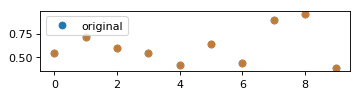

filters 2
shape (1, 2, 10, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]

  [[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]]], shape=(1, 2, 10, 1), dtype=float32)


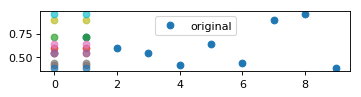

filters 3
shape (1, 3, 10, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]

  [[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]

  [[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]]], shape=(1, 3, 10, 1), dtype=float32)


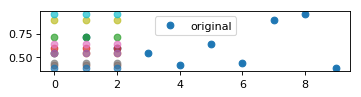

filters 4
shape (1, 4, 10, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]

  [[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]

  [[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]

  [[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]]], shape=(1, 4, 10, 1), dtype=float32)


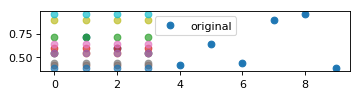

filters 5
shape (1, 5, 10, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]

  [[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]

  [[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]

  [[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]

  [[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]]], shape=(1, 5, 10, 1), dtype=float32)


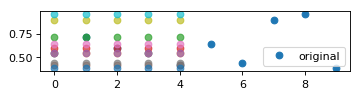

In [8]:
for i in range(1, 6):
    print('='*50)
    print('filters', i)
    _x = layers.Conv2DTranspose(filters=i, kernel_size=(1, 1), strides=(1, 1), kernel_initializer='ones', data_format=data_format)(x)
    print('shape', _x.shape)
    print('value', _x)
    
    plt.figure(figsize=(5, 1), dpi=80)
    plt.plot(np.squeeze(x), linestyle='None', marker='o', label='original')
    plt.plot(np.squeeze(_x), linestyle='None', marker='o', alpha=.7)
    plt.legend()
    plt.show()

* 커널 크기에 따른 output 확인

kernel_size 1
shape (1, 1, 10, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]]], shape=(1, 1, 10, 1), dtype=float32)


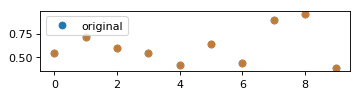

kernel_size 2
shape (1, 1, 11, 1)
value tf.Tensor(
[[[[0.5488135]
   [1.2640028]
   [1.3179526]
   [1.1476465]
   [0.968538 ]
   [1.0695488]
   [1.0834813]
   [1.3293602]
   [1.8554357]
   [1.3471043]
   [0.3834415]]]], shape=(1, 1, 11, 1), dtype=float32)


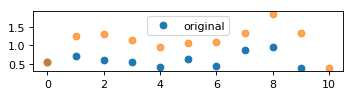

kernel_size 3
shape (1, 1, 12, 1)
value tf.Tensor(
[[[[0.5488135]
   [1.2640028]
   [1.8667662]
   [1.8628359]
   [1.5713013]
   [1.6144321]
   [1.5071361]
   [1.9752543]
   [2.2930229]
   [2.2388773]
   [1.3471043]
   [0.3834415]]]], shape=(1, 1, 12, 1), dtype=float32)


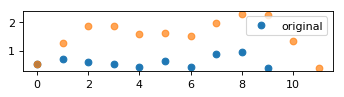

kernel_size 4
shape (1, 1, 13, 1)
value tf.Tensor(
[[[[0.5488135]
   [1.2640028]
   [1.8667662]
   [2.4116495]
   [2.2864907]
   [2.2171955]
   [2.0520194]
   [2.398909 ]
   [2.938917 ]
   [2.6764646]
   [2.2388773]
   [1.3471043]
   [0.3834415]]]], shape=(1, 1, 13, 1), dtype=float32)


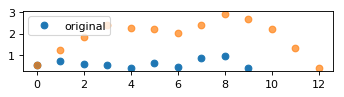

kernel_size 5
shape (1, 1, 14, 1)
value tf.Tensor(
[[[[0.5488135]
   [1.2640028]
   [1.8667662]
   [2.4116495]
   [2.8353043]
   [2.932385 ]
   [2.6547828]
   [2.9437923]
   [3.3625717]
   [3.3223586]
   [2.6764646]
   [2.2388773]
   [1.3471043]
   [0.3834415]]]], shape=(1, 1, 14, 1), dtype=float32)


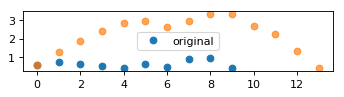

In [9]:
for i in range(1, 6):
    print('='*50)
    print('kernel_size', i)
    _x = layers.Conv2DTranspose(filters=1, kernel_size=(i, 1), strides=(1, 1), kernel_initializer='ones', data_format=data_format)(x)
    print('shape', _x.shape)
    print('value', _x)
    
    plt.figure(figsize=(5, 1), dpi=80)
    plt.plot(np.squeeze(x), linestyle='None', marker='o', label='original')
    plt.plot(np.squeeze(_x), linestyle='None', marker='o', alpha=.7)
    plt.legend()
    plt.show()

* strides 크기에 따른 output 확인

strides 1
shape (1, 1, 10, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.71518934]
   [0.60276335]
   [0.5448832 ]
   [0.4236548 ]
   [0.6458941 ]
   [0.4375872 ]
   [0.891773  ]
   [0.96366274]
   [0.3834415 ]]]], shape=(1, 1, 10, 1), dtype=float32)


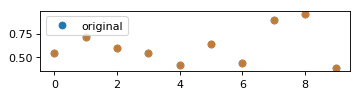

strides 2
shape (1, 1, 20, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.        ]
   [0.71518934]
   [0.        ]
   [0.60276335]
   [0.        ]
   [0.5448832 ]
   [0.        ]
   [0.4236548 ]
   [0.        ]
   [0.6458941 ]
   [0.        ]
   [0.4375872 ]
   [0.        ]
   [0.891773  ]
   [0.        ]
   [0.96366274]
   [0.        ]
   [0.3834415 ]
   [0.        ]]]], shape=(1, 1, 20, 1), dtype=float32)


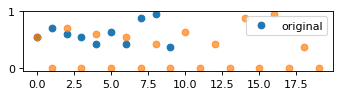

strides 3
shape (1, 1, 30, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.        ]
   [0.        ]
   [0.71518934]
   [0.        ]
   [0.        ]
   [0.60276335]
   [0.        ]
   [0.        ]
   [0.5448832 ]
   [0.        ]
   [0.        ]
   [0.4236548 ]
   [0.        ]
   [0.        ]
   [0.6458941 ]
   [0.        ]
   [0.        ]
   [0.4375872 ]
   [0.        ]
   [0.        ]
   [0.891773  ]
   [0.        ]
   [0.        ]
   [0.96366274]
   [0.        ]
   [0.        ]
   [0.3834415 ]
   [0.        ]
   [0.        ]]]], shape=(1, 1, 30, 1), dtype=float32)


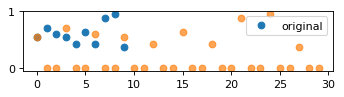

strides 4
shape (1, 1, 40, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.71518934]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.60276335]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.5448832 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.4236548 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.6458941 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.4375872 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.891773  ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.96366274]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.3834415 ]
   [0.        ]
   [0.        ]
   [0.        ]]]], shape=(1, 1, 40, 1), dtype=float32)


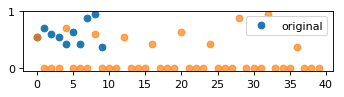

strides 5
shape (1, 1, 50, 1)
value tf.Tensor(
[[[[0.5488135 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.71518934]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.60276335]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.5448832 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.4236548 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.6458941 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.4375872 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.891773  ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.96366274]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.3834415 ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]]], shape=(1, 1, 50, 1), dtype=float32)


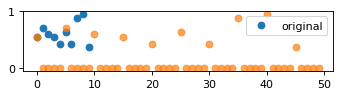

In [10]:
for i in range(1, 6):
    print('='*50)
    print('strides', i)
    _x = layers.Conv2DTranspose(filters=1, kernel_size=(1, 1), strides=(i, 1), kernel_initializer='ones', data_format=data_format)(x)
    print('shape', _x.shape)
    print('value', _x)
    
    plt.figure(figsize=(5, 1), dpi=80)
    plt.plot(np.squeeze(x), linestyle='None', marker='o', label='original')
    plt.plot(np.squeeze(_x), linestyle='None', marker='o', alpha=.7)
    plt.legend()
    plt.show()